Loading Movielens Dataset

In [77]:
import pandas as pd
ratings_column=["userid","movieid","rating","timestamp"]
ratings = pd.read_csv("ml-100k/u.data",sep="\t",names=ratings_column,parse_dates=True)
items_column=["movieid","title","release_date","video_release_date","IMDb_URL","unknown","Action","Adventure","Animation",
              "Children", "Comedy", "Crime", "Documentary", "Drama", "Fantasy","FilmNoir","Horror","Musical","Mystery", "Romance","SciFi",
              "Thriller","War","Western" ]
items = pd.read_csv("ml-100k/u.item",sep="|",names=items_column,parse_dates=True)
users_column=["userid" ,"age","gender", "occupation" , "zip code"]
users = pd.read_csv("ml-100k/u.user",sep="|",names=users_column,parse_dates=True)


In [18]:
ratings.head()

,userid,itemid,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [19]:
users.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [21]:
items.head()

,movieid,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Task 1) EDA

In [17]:
ratings.dtypes

userid       int64
itemid       int64
rating       int64
timestamp    int64
dtype: object

In [22]:
users.dtypes

user id        int64
age            int64
gender        object
occupation    object
zip code      object
dtype: object

In [23]:
items.dtypes

movieid                 int64
title                  object
release_date           object
video_release_date    float64
IMDb_URL               object
unknown                 int64
Action                  int64
Adventure               int64
Animation               int64
Children                int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Fantasy                 int64
FilmNoir                int64
Horror                  int64
Musical                 int64
Mystery                 int64
Romance                 int64
SciFi                   int64
Thriller                int64
War                     int64
Western                 int64
dtype: object

In [87]:
df.columns

Index([u'unknown', u'Action', u'Adventure', u'Animation', u'Children',
       u'Comedy', u'Crime', u'Documentary', u'Drama', u'Fantasy', u'FilmNoir',
       u'Horror', u'Musical', u'Mystery', u'Romance', u'SciFi', u'Thriller',
       u'War', u'Western'],
      dtype='object')

All the genres are in equal number.

In [56]:
import seaborn as sns
import matplotlib
%matplotlib inline

In [31]:
df=items.drop(["movieid" ,"title","release_date","video_release_date","IMDb_URL"],axis=1)

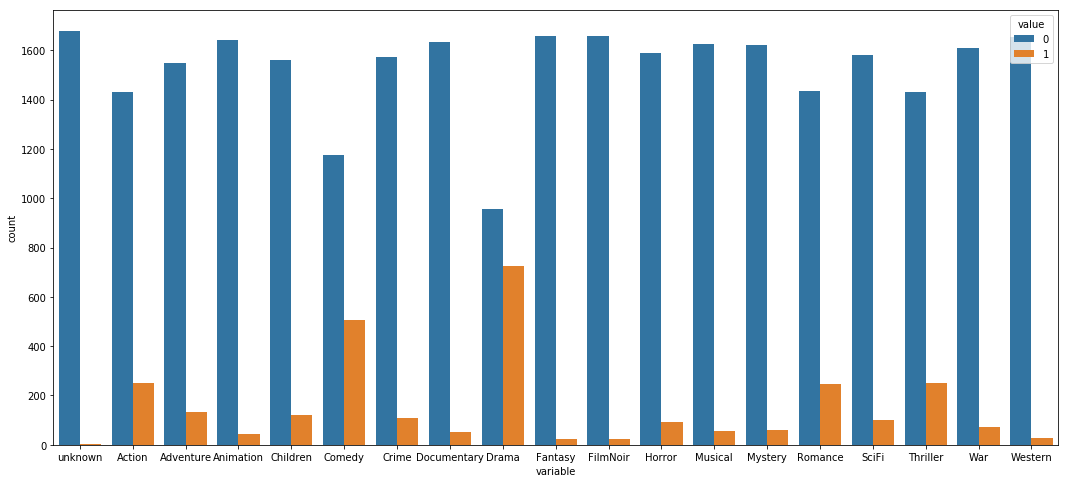

In [38]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,8))
sns.countplot(x="variable", hue="value", data=pd.melt(df))

Most of the movies are from Drama, Comedy, Action, Romance and Thriller. Most of the movies have known genres.

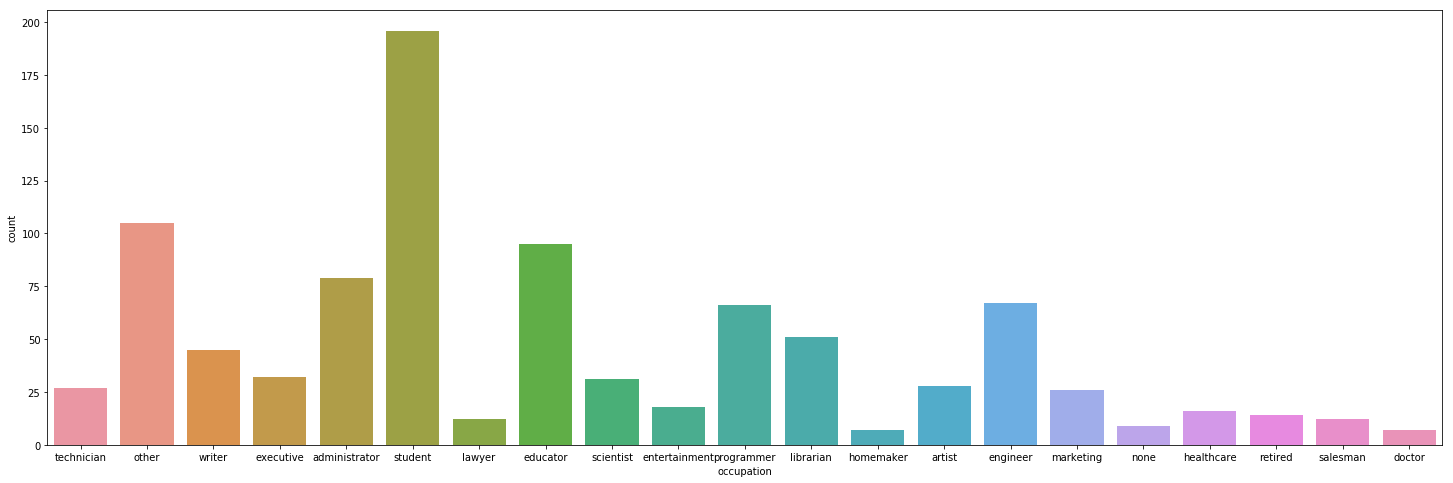

In [45]:
plt.figure(figsize=(25,8))
sns.countplot(x="occupation", data=users)

Most of the movie viewers are students followed by educator, administrator, programmer, engineer and others.

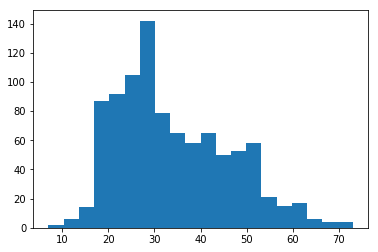

In [49]:
plt.hist(users.age,bins=20)
plt.show()

In [51]:
print("The maximum age of the user is "+str(users.age.max()))
print("The minimum age of the user is "+str(users.age.min()))

The maximum age of the user is 73
The minimum age of the user is 7


Most of the users are in the group of 20-30. There is no outlier in case of age.

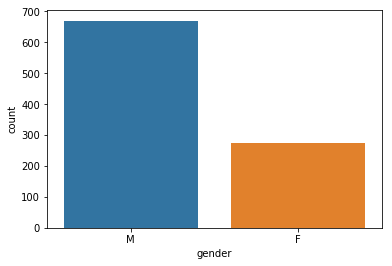

In [52]:
sns.countplot(x="gender", data=users)

A large population of users are male.

In [65]:
print("The maximum release date is "+str(items.release_date.max()))

The maximum release date is 4-Feb-1971


The data given is quite old.

In [ ]:
sns.countplot(x="rating", data=ratings)

In [78]:
users_ratings = pd.merge(users, ratings)

In [79]:
users_ratings.head()

,userid,age,gender,occupation,zip code,movieid,rating,timestamp
0,1,24,M,technician,85711,61,4,878542420
1,1,24,M,technician,85711,189,3,888732928
2,1,24,M,technician,85711,33,4,878542699
3,1,24,M,technician,85711,160,4,875072547
4,1,24,M,technician,85711,20,4,887431883


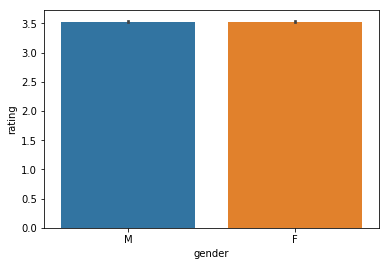

In [80]:
sns.barplot(x='gender',y='rating',data=users_ratings)

Both male and female users rate equally on an average.

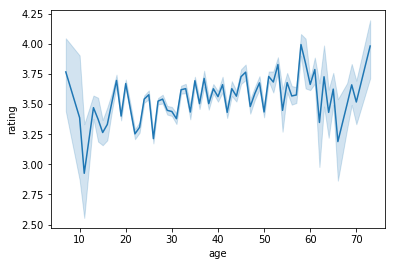

In [81]:
sns.lineplot(x='age',y='rating',data=users_ratings)

There is no general trend between age and rating.

In [82]:
users_ratings_items=pd.merge(users_ratings,items)

In [83]:
users_ratings_items.head()

,userid,age,gender,occupation,zip code,movieid,rating,timestamp,title,release_date,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0


In [104]:
x=users_ratings_items[users_ratings_items['gender']=='F']

In [105]:
genres=['unknown', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'FilmNoir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller',
       'War', 'Western']
df=x[genres]

In [98]:
df.head()

,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


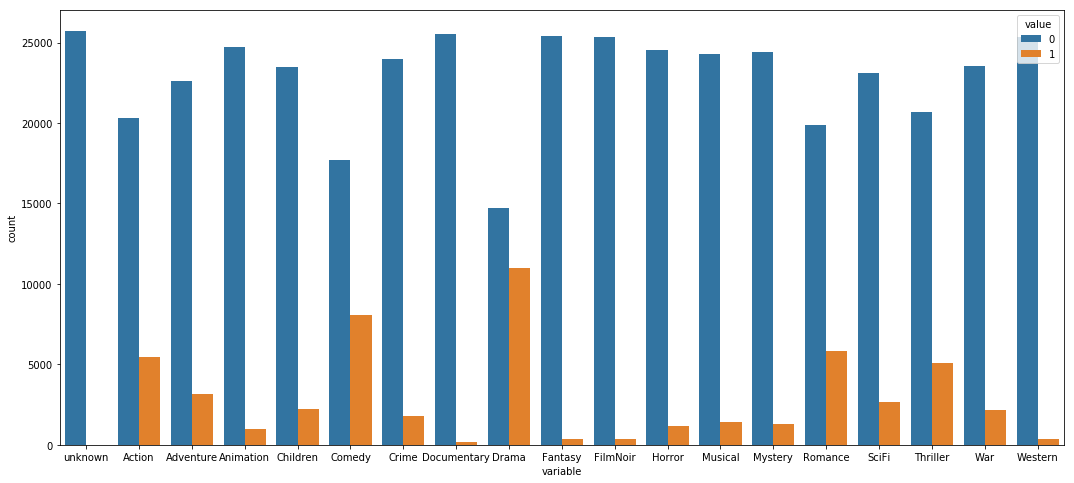

In [99]:
plt.figure(figsize=(18,8))
sns.countplot(x="variable", hue="value", data=pd.melt(df))

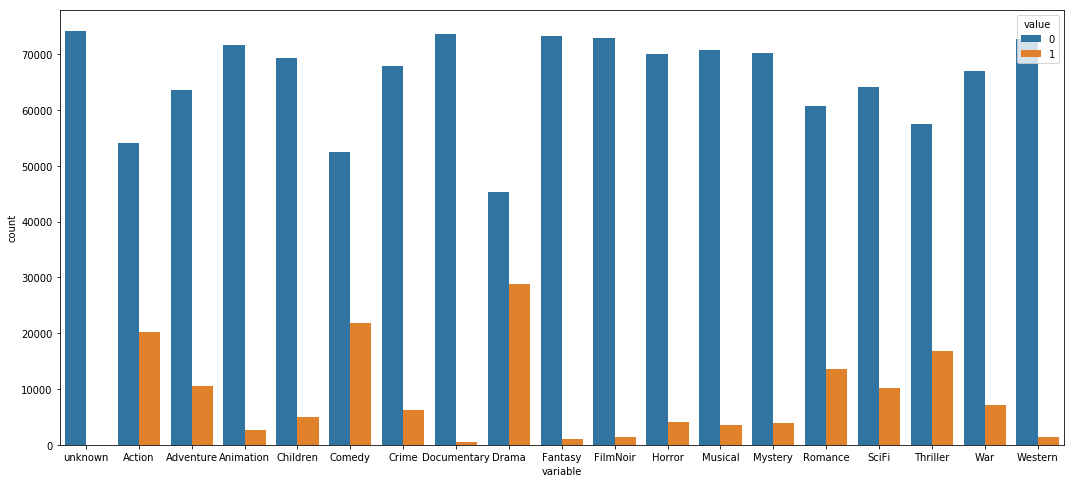

In [100]:
y=users_ratings_items[users_ratings_items['gender']=='M']
df=y[genres]
plt.figure(figsize=(18,8))
sns.countplot(x="variable", hue="value", data=pd.melt(df))

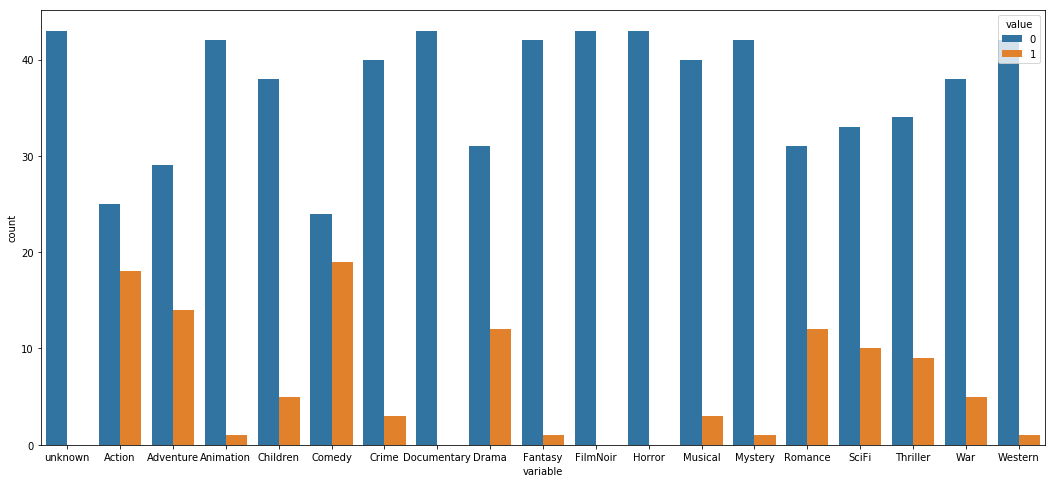

In [102]:
age=users_ratings_items[users_ratings_items['age']<10]
df=age[genres]
plt.figure(figsize=(18,8))
sns.countplot(x="variable", hue="value", data=pd.melt(df))

# Task 2) Memory-Based Method

### User-based collaborative filtering